<a href="https://colab.research.google.com/github/kunjkinger/machine-learning-projects/blob/time_series_analysis/ARMA_and_arima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from statsmodels.tsa.arima_model import ARMA,ARIMA,ARIMAResults,ARMAResults

In [4]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [5]:
pip install "pmdarima>=1.1.0,<1.1.1" as pm

     |████████████████████████████████| 696kB 6.7MB/s 
  Created wheel for pm: filename=pm-0.1.1-cp37-none-any.whl size=9284 sha256=ac385e699bf6dfba42a18262f425ed5f375d7e1db9628d88cd3069610671cdb5
  Stored in directory: /root/.cache/pip/wheels/55/e0/0c/7a6356cd6097c4670c6ad74ffcd9b5af47045b73f49917b4df
Successfully built pm


In [6]:
from pmdarima import auto_arima

In [9]:
df1 = pd.read_csv('DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df1.index.freq = 'D'
df1 = df1[:120]

In [10]:
df2 = pd.read_csv('TradeInventories.csv',index_col='Date',parse_dates=True)
df2.index.freq = 'MS'

ARMA MODEL


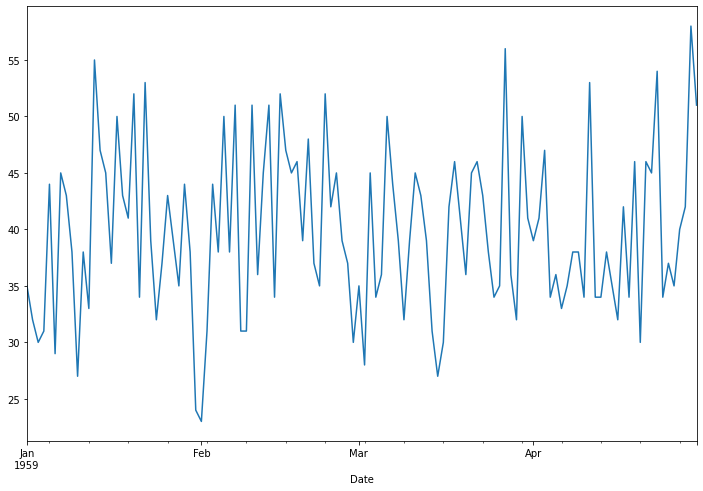

In [11]:
df1['Births'].plot(figsize=(12,8))

In [12]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):x

  print(f'Augmented Dickey-Fuller Test: {title}')
  result = adfuller(series.dropna(),autolag='AIC') # incase data has missing values

  labels = ['ADF test statistic','p-value','Lags used','Observations']
  out = pd.Series(result[0:4],index=labels)

  for key,val in result[4].items():
    out[f'critical value ({key})'] = val

  print(out.to_string()) # incase dtype:float64

  if result[1] <= 0.05:
    print('Strong evidence againgst null hypothesis')
    print('reject the null hypothesis')
    print('data has no unit root and is staionary')
  else:
    print('week evidence againgst null hypothesis')
    print('Fail to reject the null hypothesis')
    print('data has a unit root and is non-staionary')

In [13]:
adf_test(df1['Births'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -9.855384e+00
p-value                 4.373545e-17
Lags used               0.000000e+00
Observations            1.190000e+02
critical value (1%)    -3.486535e+00
critical value (5%)    -2.886151e+00
critical value (10%)   -2.579896e+00
Strong evidence againgst null hypothesis
reject the null hypothesis
data has no unit root and is staionary


In [14]:
auto_arima(df1['Births'],seasonal=False).summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  120
Model:                     ARMA(2, 2)   Log Likelihood                -405.370
Method:                       css-mle   S.D. of innovations              6.991
Date:                Sat, 26 Jun 2021   AIC                            822.741
Time:                        17:16:53   BIC                            839.466
Sample:                             0   HQIC                           829.533
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.8163      0.108    368.757      0.000      39.605      40.028
ar.L1.y        1.8568      0.081     22.924      0.000       1.698       2.016
ar.L2.y       -0.8814      0.073    -12.025      0.000      -1.025      -0.738
ma.L1.y       -1.8632      0.109    -17.123      0.000      -2.077      -1.650
ma.L2.y        0.8632      0.108      8.018      0.000       0.652       1.074
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0534           -0.1582j            1.0652           -0.0237
AR.2            1.0534           +0.1582j            1.0652            0.0237
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2            1.1584           +0.0000j            1.1584            0.0000
-----------------------------------------------------------------------------
"""

In [15]:
train = df1.iloc[:90]
test = df1.iloc[90:]

In [16]:
model = ARMA(train['Births'],order=(2,2))

In [17]:
result = model.fit()

In [18]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 Births   No. Observations:                   90
Model:                     ARMA(2, 2)   Log Likelihood                -307.905
Method:                       css-mle   S.D. of innovations              7.405
Date:                Sat, 26 Jun 2021   AIC                            627.809
Time:                        17:19:39   BIC                            642.808
Sample:                    01-01-1959   HQIC                           633.858
                         - 03-31-1959                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           39.7549      0.912     43.607      0.000      37.968      41.542
ar.L1.Births    -0.1850      1.087     -0.170      0.865      -2.315       1.945
ar.L2.Births     0.4352      0.644      0.675      0.501      -0.828       1.698
ma.L1.Births     0.2777      1.097      0.253      0.801      -1.872       2.427
ma.L2.Births    -0.3999      0.679     -0.589      0.557      -1.730       0.930
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.3181           +0.0000j            1.3181            0.5000
AR.2            1.7434           +0.0000j            1.7434            0.0000
MA.1           -1.2718           +0.0000j            1.2718            0.5000
MA.2            1.9662           +0.0000j            1.9662            0.0000
-----------------------------------------------------------------------------
"""

In [19]:
start = len(train)
end = len(train) + len(test) - 1

In [20]:
predictions = result.predict(start,end).rename('ARMA 2,2 prediction')

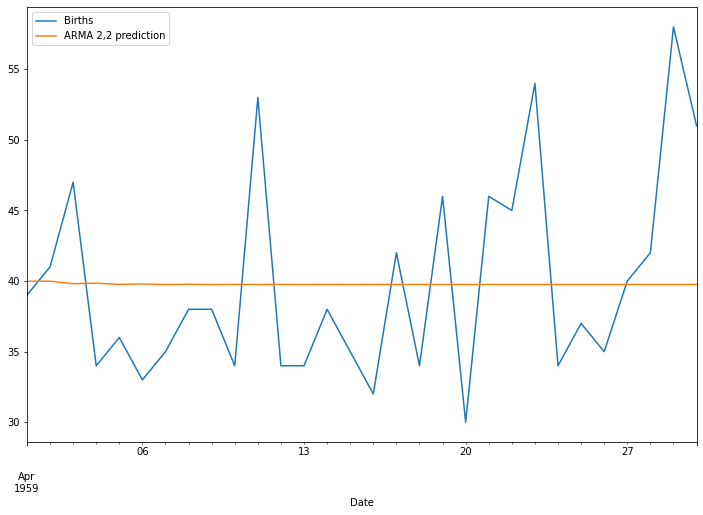

In [25]:
test['Births'].plot(figsize=(12,8),legend=True)
predictions.plot(legend=True)

In [26]:
test.mean()

Births    39.833333
dtype: float64

In [27]:
predictions.mean()

39.77743317683283

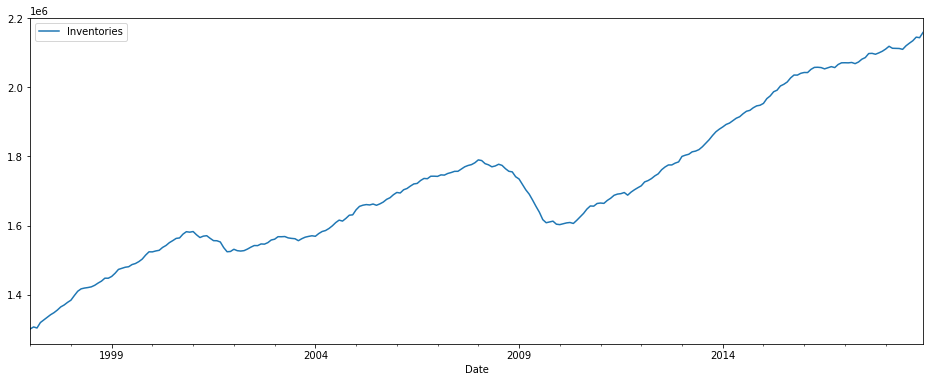

In [31]:
df2.plot(figsize=(16,6))

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose

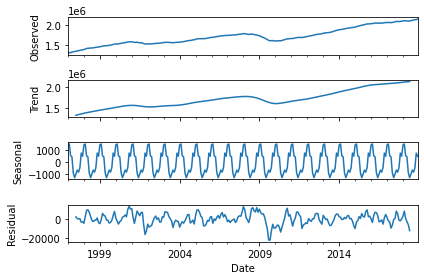

In [34]:
result = seasonal_decompose(df2['Inventories'],model='add')
result.plot();

In [35]:
auto_arima(df2['Inventories'],seasonal=False).summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  263
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2610.253
Method:                       css-mle   S.D. of innovations           4938.260
Date:                Sat, 26 Jun 2021   AIC                           5228.505
Time:                        17:33:06   BIC                           5242.794
Sample:                             1   HQIC                          5234.247
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3460.5361   1312.998      2.636      0.009     887.108    6033.964
ar.L1.D.y      0.9037      0.039     23.413      0.000       0.828       0.979
ma.L1.D.y     -0.5731      0.076     -7.545      0.000      -0.722      -0.424
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1066           +0.0000j            1.1066            0.0000
MA.1            1.7447           +0.0000j            1.7447            0.0000
-----------------------------------------------------------------------------
"""

In [36]:
from statsmodels.tsa.statespace.tools import diff

In [37]:
df2['Diff_1'] = diff(df2['Inventories'],k_diff=1)

In [38]:
adf_test(df2['Diff_1'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -3.412249
p-value                   0.010548
Lags used                 4.000000
Observations            258.000000
critical value (1%)      -3.455953
critical value (5%)      -2.872809
critical value (10%)     -2.572775
Strong evidence againgst null hypothesis
reject the null hypothesis
data has no unit root and is staionary


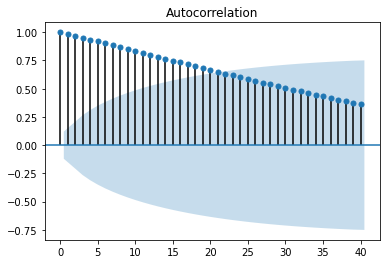

In [40]:
plot_acf(df2['Inventories'],lags=40); #slow decay in acf means its better fit for AR  

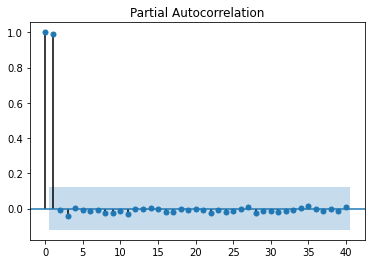

In [41]:
plot_pacf(df2['Inventories'],lags=40); # large decay in pacf means AR

In [44]:
#choosing p,q and d values through classical methods using above plots but auto_arima is way more convienenet
# above plots saying that
# AR = 1
# I = 1
# MA = 0 OR 1

In [45]:
stepwise_fit = auto_arima(df2['Inventories'],start_p=0,start_q=0,max_p=2,max_q=2,seasonal=False,trace=True)

Fit ARIMA: order=(0, 1, 0); AIC=5348.037, BIC=5355.181, Fit time=0.005 seconds
Fit ARIMA: order=(1, 1, 0); AIC=5250.883, BIC=5261.599, Fit time=0.082 seconds
Fit ARIMA: order=(0, 1, 1); AIC=5283.095, BIC=5293.811, Fit time=0.079 seconds
Fit ARIMA: order=(2, 1, 0); AIC=5240.553, BIC=5254.842, Fit time=0.092 seconds


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(2, 1, 1); AIC=5229.526, BIC=5247.387, Fit time=0.299 seconds
Fit ARIMA: order=(1, 1, 1); AIC=5228.505, BIC=5242.794, Fit time=0.226 seconds
Fit ARIMA: order=(1, 1, 2); AIC=5229.290, BIC=5247.150, Fit time=0.239 seconds
Fit ARIMA: order=(2, 1, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 1.059 seconds


In [46]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  263
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2610.253
Method:                       css-mle   S.D. of innovations           4938.260
Date:                Sat, 26 Jun 2021   AIC                           5228.505
Time:                        19:03:30   BIC                           5242.794
Sample:                             1   HQIC                          5234.247
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3460.5361   1312.998      2.636      0.009     887.108    6033.964
ar.L1.D.y      0.9037      0.039     23.413      0.000       0.828       0.979
ma.L1.D.y     -0.5731      0.076     -7.545      0.000      -0.722      -0.424
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1066           +0.0000j            1.1066            0.0000
MA.1            1.7447           +0.0000j            1.7447            0.0000
-----------------------------------------------------------------------------
"""

In [48]:
len(df2)

264

In [49]:
train = df2.iloc[:252]
test = df2.iloc[252:]

In [50]:
model = ARIMA(train['Inventories'],order=(1,1,1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.Inventories   No. Observations:                  251
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2486.395
Method:                       css-mle   S.D. of innovations           4845.028
Date:                Sat, 26 Jun 2021   AIC                           4980.790
Time:                        19:11:00   BIC                           4994.892
Sample:                    02-01-1997   HQIC                          4986.465
                         - 12-01-2017                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3197.5697   1344.875      2.378      0.018     561.663    5833.477
ar.L1.D.Inventories     0.9026      0.039     23.011      0.000       0.826       0.979
ma.L1.D.Inventories    -0.5581      0.079     -7.048      0.000      -0.713      -0.403
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1080           +0.0000j            1.1080            0.0000
MA.1            1.7918           +0.0000j            1.7918            0.0000
-----------------------------------------------------------------------------
"""

In [53]:
start = len(train)
end = start + len(test) - 1

In [55]:
prediction = results.predict(start,end,typ='levels').rename('ARIMA (1,1,1) predictions')

In [56]:
prediction

2018-01-01    2.107148e+06
2018-02-01    2.110526e+06
2018-03-01    2.113886e+06
2018-04-01    2.117231e+06
2018-05-01    2.120561e+06
2018-06-01    2.123878e+06
2018-07-01    2.127184e+06
2018-08-01    2.130479e+06
2018-09-01    2.133764e+06
2018-10-01    2.137041e+06
2018-11-01    2.140311e+06
2018-12-01    2.143573e+06
Freq: MS, Name: ARIMA (1,1,1) predictions, dtype: float64

In [57]:
test

,Inventories,Diff_1
Date,,
2018-01-01,2110158,6407.0
2018-02-01,2118199,8041.0
2018-03-01,2112427,-5772.0
2018-04-01,2112276,-151.0
2018-05-01,2111835,-441.0
2018-06-01,2109298,-2537.0
2018-07-01,2119618,10320.0
2018-08-01,2127170,7552.0
2018-09-01,2134172,7002.0


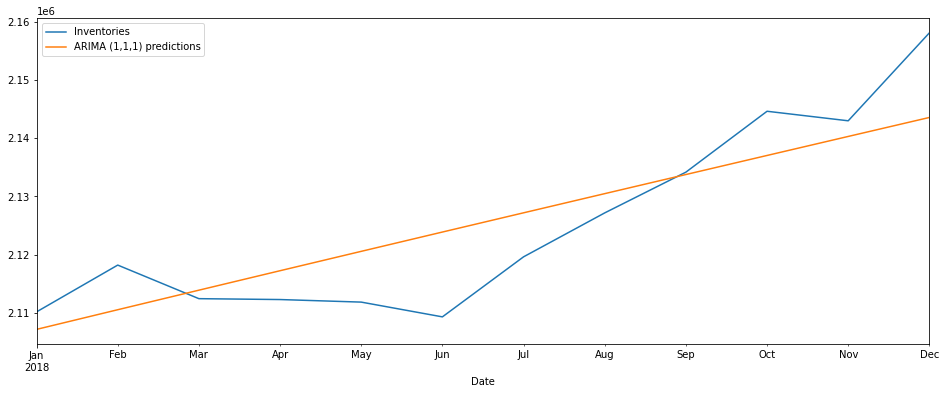

In [58]:
test['Inventories'].plot(legend=True,figsize=(16,6))
prediction.plot(legend=True)

In [59]:
from statsmodels.tools.eval_measures import rmse

In [60]:
error = rmse(test['Inventories'],prediction)

In [61]:
error

7789.596900611291

In [63]:
test['Inventories'].mean()

2125075.6666666665

In [64]:
prediction.mean()

2125465.2711859173

#forecast into unknown future

In [65]:
model = ARIMA(df2['Inventories'],order=(1,1,1))


In [66]:
results = model.fit()

In [68]:
fcast = results.predict(start = len(df2),end=len(df2)+11,typ='levels').rename('arima (1,1,1) forecast')

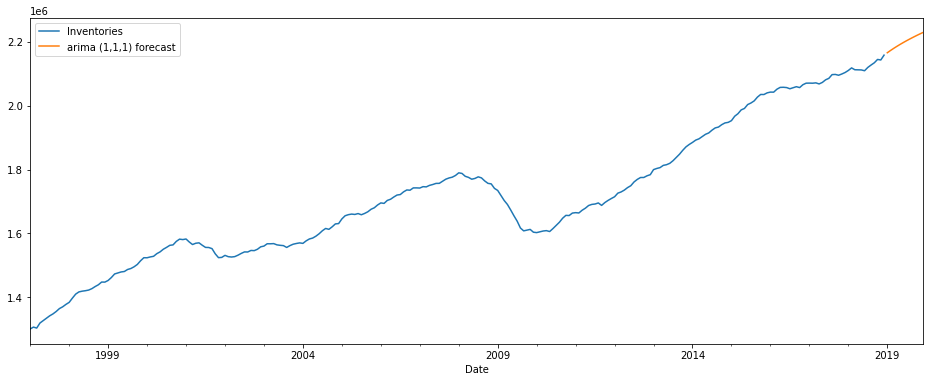

In [69]:
df2['Inventories'].plot(legend=True,figsize=(16,6))
fcast.plot(legend=True)